# RandomForestRegressor

In this section, the cleaned dataset will be load and model.

## Import libary & data

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [9]:
# Cleaned data
data = pd.read_csv("../dataset/df_day_data.csv")

# With outliers
X_train = pd.read_csv("../dataset/with_outliers/X_train.csv")
X_test = pd.read_csv("../dataset/with_outliers/X_test.csv")
Y_train = pd.read_csv("../dataset/with_outliers/y_train.csv")
Y_test = pd.read_csv("../dataset/with_outliers/y_test.csv")
Y_train_ori = pd.read_csv("../dataset/with_outliers/Y_train_ori.csv")
Y_test_ori = pd.read_csv("../dataset/with_outliers/Y_test_ori.csv")

# Without outliers
no_X_train = pd.read_csv("../dataset/no_outliers/X_train.csv")
no_X_test = pd.read_csv("../dataset/no_outliers/X_test.csv")
no_Y_train = pd.read_csv("../dataset/no_outliers/y_train.csv")
no_Y_test = pd.read_csv("../dataset/no_outliers/y_test.csv")
no_Y_train_ori = pd.read_csv("../dataset/no_outliers/Y_train_ori.csv")
no_Y_test_ori = pd.read_csv("../dataset/no_outliers/Y_test_ori.csv")

### Random Forest Regression Model

#### Why Forest Regression Model:

The basic idea behind this model is a collection of multiple random decision trees and it's much less sensitive to the training data. In short, this model randomly perform row sampling and feature sampling from the dataset forming sample datasets by a progress called Bootstrap. The sample flow of this model is listed below:

#### Hypothesis:

RandomForestRegressor Model score better accuracy when fed with datasets without outliers.

#### Initialization & function declaration:

In [10]:
# Reusable functions and objects
regressor = RandomForestRegressor(random_state=42)

# Function to reverse min_max_scaler
def rev_min_max(ori_data, scaled_data, column_name):
    max_data = max(ori_data[column_name])
    min_data = min(ori_data[column_name])
    # In case any random state 
    ori_data = (scaled_data*(max_data - min_data)) + min_data
    return ori_data

# Function to make predictions
def prediction(ori_data, x_test, clf_object):
    
    y_pred    = clf_object.predict(x_test) 
    
    print ("Predicted values for count:")
    to_show_pred   = np.round(rev_min_max(ori_data, y_pred, "count"), 0)

    print (to_show_pred)
    print ("")
    return y_pred
      
# Function to calculate accuracy for continuos values.
def cal_regressor_accuracy(y_test, y_pred):
    
    mean   = metrics.mean_absolute_error(y_test, y_pred)
    mean2  = metrics.mean_squared_error(y_test, y_pred)
    rmean2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2     = metrics.r2_score(y_test, y_pred)
    print ('Mean     : ', np.round(mean  , 4))
    print ('MSE      : ', np.round(mean2 , 4))
    print ('RMSE     : ', np.round(rmean2, 4))
    print ("Accuracy : ", np.round(r2*100, 4), " %")
    print ("")
    
def display_result(y_test_ori, x_train, x_test, y_train, y_test, condition):
    
    # Dataset Information
    print ("=====================")
    print (" Dataset Information ")
    print ("=====================")
    if condition == "with_outlier":
        print ("Dataset Used   : day.csv => X_train, X_test, Y_train, Y_test")
    else:
        print ("Dataset Used   : day.csv => no_X_train, no_X_test, no_Y_train, no_Y_test")
    print ("Dataset Length :", len(data))
    print ("Dataset Shape  :", data.shape)
    s = ""
    for col in data.columns[:].values:
        s = col + " " + s
    print ("Dataset Column :", s)
    print ("")

    # Prediction Using Regressor
    print ("=====================")
    print ("  Regressor & Train  ")
    print ("=====================")
    regressor_data = regressor.fit(x_train, y_train)
    y_prediction   = prediction(y_test_ori, x_test, regressor_data)
    cal_regressor_accuracy(y_test, y_prediction)

#### With_outliers : X_train, Y_train, X_test, Y_test

In [11]:
# Initialising Phase
y_test_ori, x_train, x_test, y_train, y_test = Y_test_ori, X_train, X_test, Y_train, Y_test
condition = "with_outlier"

# Building Phase
display_result(y_test_ori, x_train, x_test, y_train, y_test, condition)

 Dataset Information 
Dataset Used   : day.csv => X_train, X_test, Y_train, Y_test
Dataset Length : 718
Dataset Shape  : (718, 12)
Dataset Column : count registereduser casualuser windspeed humidity temperature weather weekday holiday month year season 

  Regressor & Train  
Predicted values for count:
[5378. 4911. 2058. 1657. 3806. 3149. 4392. 6313. 6650. 1317. 1991. 2305.
 2386. 5295. 4977. 4875. 7656. 6304. 3583. 2709. 7733. 2813. 5424. 5004.
 2246. 7074. 4122. 5436. 7447. 7669. 1729. 5113. 5943. 5506. 2761. 4333.
 6693. 6273. 2805. 3840. 7016. 2116. 4974. 4313. 7526. 7290. 3404. 4608.
 2570. 2455. 6817. 7044. 5623. 7103. 4537. 4254. 3933. 7039. 6976. 3373.
 7131. 4467. 4855. 8274. 7383. 3363. 4912. 6433. 6867. 5282. 6569. 7429.
 3533. 7001. 4278. 6868. 6302. 7145. 3445. 2858. 4714. 5314. 5458. 2299.
 4724. 7493. 5488. 6189. 5150. 4530. 1326. 2793. 6671. 7036. 5435. 3580.
 2702. 7512. 4859. 3851. 4131. 6395. 3857. 7757. 3751. 4626. 7863. 7879.
 5417. 2706. 4038. 4456. 4333. 2524. 2

#### No_outliers : no_X_train, no_Y_train, no_X_test, no_Y_test

In [12]:
# Initialising Phase
y_test_ori, x_train, x_test, y_train, y_test = no_Y_test_ori, no_X_train, no_X_test, no_Y_train, no_Y_test
condition = "no_outlier"

# Building Phase
display_result(y_test_ori, x_train, x_test, y_train, y_test, condition)

 Dataset Information 
Dataset Used   : day.csv => no_X_train, no_X_test, no_Y_train, no_Y_test
Dataset Length : 718
Dataset Shape  : (718, 12)
Dataset Column : count registereduser casualuser windspeed humidity temperature weather weekday holiday month year season 

  Regressor & Train  
Predicted values for count:
[6979. 7504. 6977. 5946. 5429. 6008. 3900. 2063. 1690. 1981. 6042. 6068.
 2717. 4066. 3960. 2778. 4434. 5462. 4072. 7001. 3919. 3177. 5140. 7024.
 5260. 6350. 4806. 7722. 1802. 2923. 4484. 5565. 6768. 5505. 7156. 6364.
 7240. 4160. 3841. 2197. 2364. 4224. 2734. 7348. 4826. 5311. 4272. 4012.
 3885. 8207. 4134. 7649. 6166. 7778. 5520. 6307. 3123. 3370. 7781. 7562.
 5209. 6933. 6827. 1533. 5200. 5121. 3221. 3279. 5594. 6306. 5637. 7047.
 3854. 3564. 2780. 4698. 2534. 6255. 2767. 5114. 5251. 2180. 4473. 7402.
 6817. 6953. 7336. 4311. 1499. 2551. 7861. 7235. 3858. 6661. 7434. 3447.
 6112. 4547. 7787. 4598. 4356. 4111. 4762. 7847. 7590. 2669. 7885. 4669.
 2870. 7755. 2419. 6789. 2

#### Observation : RandomForestRegressor Model Accuracy

In short, the RandomForestRegressor Model score 89-90% accuracy with the day.csv datasets where it hit better accuracy when fed with datasets without outliers(90%) while scoring lower(89%) when fed with datasets with outliers .

#### For Visualising Result:

 Dataset Information 
Dataset Used   : day.csv
Dataset Length : 718
Dataset Shape  : (718, 12)
Dataset Column : season year month holiday weekday weather windspeed humidity temperature 

Enter the data column act as the x_axis for prediction: windspeed


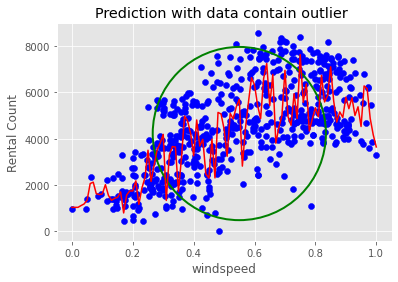

This red line was the line of prediction. Most data recorded between 0.35 to 0.85 windspeed score as shown by the green circle.
----------------------------
 Analysis of windspeed data 
----------------------------
1. Temperature Score Analysis
Mode   :  ModeResult(mode=array([[0.26163674]]), count=array([[4]]))
Mean   :  0.55
Median :  0.54

2. Bike Rental Count Analysis
Q[50%] :  4335.0



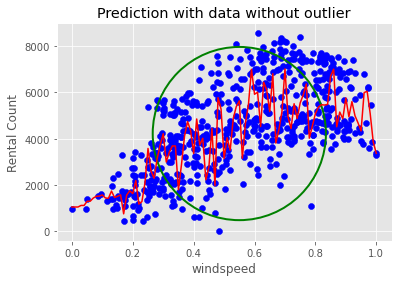

This red line was the line of prediction. Most data recorded between 0.35 to 0.85 windspeed score as shown by the green circle.
----------------------------
 Analysis of windspeed data 
----------------------------
1. Temperature Score Analysis
Mode   :  ModeResult(mode=array([[0.47892667]]), count=array([[4]]))
Mean   :  0.55
Median :  0.56

2. Bike Rental Count Analysis
Q[50%] :  4114.0



In [39]:
cols_K = ["temperature","humidity","windspeed","weather","weekday","holiday","month","year","season"]
K_ref  = ["season","year","month","holiday","weekday","weather","windspeed","humidity","temperature"]
K_f    = [0,1,2,3,4,5,6,7,8]
K_b    = [1,2,3,4,5,6,7,8,9]

def intro():
    print ("=====================")
    print (" Dataset Information ")
    print ("=====================")
    print ("Dataset Used   : day.csv")
    print ("Dataset Length :", len(data))
    print ("Dataset Shape  :", data.shape)
    c = ""
    for col in cols_K:
        c = col + " " + c
    print ("Dataset Column :", c)
    print ("")
    key = input("Enter the data column act as the x_axis for prediction: ")
    return key

def visualise_prediction(x,y,title,x_axis,y_axis,text):
    # Create regressor object
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

    # Fit the regressor with x and y data
    regressor.fit(x, y)  

    # What to predict...in our case is count
    Y_pred = regressor.predict(np.array([8.5]).reshape(1, 1))

    # Visualising the Random Forest Regression results
    # Arange values from min value of x to max value of x with a difference of 0.01 between two consecutive values
    X_grid = np.arange(min(x), max(x), 0.01) 

    # Reshape for reshaping the data into a len(X_grid)*1 array            
    X_grid = X_grid.reshape((len(X_grid), 1))

    # Scatter plot for original data
    plt.scatter(x, y, color = 'blue')  

    # Plot predicted data
    plt.plot(X_grid, regressor.predict(X_grid), color = 'red') 
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    
    # Draw circle for windspeed, humidity and temperature
    if   x_axis == "windspeed"  :
        plt.scatter( 0.55  , 4225 , s=30000 ,  facecolors='none', edgecolors='green', linewidth=2) 
        text = text + " Most data recorded between 0.35 to 0.85 windspeed score as shown by the green circle."
    elif x_axis == "humidity"   :
        plt.scatter( 0.60 , 4217 , s=30000 ,  facecolors='none', edgecolors='green', linewidth=2)
        text = text + " Most data recorded between 0.30 to 0.90 humidity score as shown by the green circle."
    elif x_axis == "temperature":
        plt.scatter( 0.40  , 4120 , s=30000 ,  facecolors='none', edgecolors='green', linewidth=2)
        text = text + " Most data recorded between 0.10 to 0.70 temperature score as shown by the green circle."
        
    plt.show()
    
    # Observation text
    print(text)
    
    # Display logic for explanation
    if x_axis == "season":
        print("--------------------------")
        print(" Prediction for next year ")
        print("--------------------------")
        mnth = ["Winter(1): ", 
                "Spring(2): ", 
                "Summer(3): ", 
                "Fall  (4): "]
        cnt = 1
        c = 0
        for n in np.round(regressor.predict(X_grid),0):
            if (cnt == 1 or cnt == 33 or cnt == 67 or cnt == 100):
                print(mnth[c], n)
                c += 1
            cnt += 1
    elif x_axis == "year":
        print("---------------------------")
        print(" Prediction for next years ")
        print("---------------------------")
        first_year  = 0
        second_year = 0
        cnt = 1
        for n in np.round(regressor.predict(X_grid),0):
            if (cnt == 1 or cnt == 100):
                if cnt == 1:
                    first_year  = n
                elif cnt == 100:
                    second_year = n
            cnt += 1
        print("Year 2011       : ", first_year)
        print("Year 2012       : ", second_year)
        print("Next year(2013) : ", (second_year+(second_year - first_year)))
        if second_year > first_year:
            print("The number increased by ", (second_year - first_year))
        elif second_year < first_year:
            print("The number decreased by ", (second_year - first_year))
        else:
            print("The number remained the same")
    elif x_axis == "month":
        print("--------------------------")
        print(" Prediction for next year ")
        print("--------------------------")
        mnth = ["Jan: ", "Feb: ", "Mar: ", "Apr: ", "May: ", "Jun: ", "Jul: ", "Aug: ", "Sep: ", "Oct: ", "Nov: ", "Dec: "]
        cnt = 1
        c = 0
        for n in np.round(regressor.predict(X_grid),0):
            if (cnt == 1 or cnt == 9 or cnt == 18 or cnt == 27 or cnt == 36 or cnt == 45 or cnt == 55 or cnt == 64 or cnt == 72 or cnt == 82 or cnt == 91 or cnt == 100):
                print(mnth[c], n)
                c += 1
            cnt += 1
    elif x_axis == "holiday":
        print("--------------------------")
        print(" Prediction for next year ")
        print("--------------------------")
        mnth = ["Holiday(1): ", 
                "Workday(0): "]
        cnt = 1
        c = 0
        for n in np.round(regressor.predict(X_grid),0):
            if (cnt == 1 or cnt == 100):
                print(mnth[c], n)
                c += 1
            cnt += 1
    elif x_axis == "weekday":
        print("--------------------------")
        print(" Prediction for next year ")
        print("--------------------------")
        mnth = ["Sunday    (0): ",
                "Monday    (1): ",
                "Tuesday   (2): ",
                "Wednesday (3): ",
                "Thursday  (4): ",
                "Friday    (5): ",
                "saturday  (6): "]
        cnt = 1
        c = 0
        for n in np.round(regressor.predict(X_grid),0):
            if (cnt == 1 or cnt == 17 or cnt == 33 or cnt == 50 or cnt == 67 or cnt == 83 or cnt == 100):
                print(mnth[c], n)
                c += 1
            cnt += 1
    elif x_axis == "weather":
        print("--------------------------")
        print(" Prediction for next year ")
        print("--------------------------")
        mnth = ["Clear, Few clouds, Partly cloudy, Partly cloudy                                        (1): ", 
                "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                           (2): ", 
                "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds(3): ", 
                "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                             (4): "]
        cnt = 1
        c = 0
        for n in np.round(regressor.predict(X_grid),0):
            if (cnt == 1 or cnt == 33):
                print(mnth[c], n)
                c += 1
            elif (cnt == 100):
                print(mnth[c], n)
                print(mnth[c+1], "0.0 (No record)")
                c += 1
            cnt += 1
    elif x_axis == "windspeed":
        print("----------------------------")
        print(" Analysis of windspeed data ")
        print("----------------------------")
        
        # Creating the Series
        sr_Y = pd.Series(np.round(regressor.predict(X_grid),0))
        sr_X = x

        # Print the series
        print("1. Temperature Score Analysis")
        print("Mode   : ", stats.mode(sr_X))
        print("Mean   : ", np.round(np.mean(sr_X),2))
        print("Median : ", np.round(np.median(sr_X),2))
        print("")
        
        # return the value of 90 % quantile
        print("2. Bike Rental Count Analysis")
        print("Q[50%] : ", sr_Y.quantile(0.5))
        print("")
        
    elif x_axis == "humidity":
        print("---------------------------")
        print(" Analysis of humidity data ")
        print("---------------------------")
        
        # Creating the Series
        sr_Y = pd.Series(np.round(regressor.predict(X_grid),0))
        sr_X = x

        # Print the series
        print("1. Temperature Score Analysis")
        print("Mode   : ", stats.mode(sr_X))
        print("Mean   : ", np.round(np.mean(sr_X),2))
        print("Median : ", np.round(np.median(sr_X),2))
        print("")
        
        # return the value of 90 % quantile
        print("2. Bike Rental Count Analysis")
        print("Q[50%] : ", sr_Y.quantile(0.5))
        print("")
        
    elif x_axis == "temperature":
        print("------------------------------")
        print(" Analysis of temperature data ")
        print("------------------------------")
        
        # Creating the Series
        sr_Y = pd.Series(np.round(regressor.predict(X_grid),0))
        sr_X = x

        # Print the series
        print("1. Temperature Score Analysis")
        print("Mode   : ", stats.mode(sr_X))
        print("Mean   : ", np.round(np.mean(sr_X),2))
        print("Median : ", np.round(np.median(sr_X),2))
        print("")
        
        # return the value of 90 % quantile
        print("2. Bike Rental Count Analysis")
        print("Q[50%] : ", sr_Y.quantile(0.5))
        print("")
        
def personalised_prediction(key):
    title_with_outliers  = "Prediction with data contain outlier "
    title_no_outliers    = "Prediction with data without outlier"
    x_axis               = key
    y_axis               = "Rental Count"
    text                 = "This red line was the line of prediction."
        
    # Navigate to respective column key coordinates
    if key in cols_K:
        i = K_ref.index(key)
        x_f = K_f[i]
        x_b = K_b[i]
            
        # For test data with outliers
        x = X_train.iloc[:, x_f:x_b].values 
        y = Y_train_ori.iloc[:,:1].values 
        visualise_prediction(x,y,title_with_outliers,x_axis,y_axis,text)

        # For test data without outliers
        x_no = no_X_train.iloc[:, x_f:x_b].values
        y_no = no_Y_train_ori.iloc[:,:1].values 
        visualise_prediction(x_no,y_no,title_no_outliers,x_axis,y_axis,text)
    else:
        print("Invalid Column Name")
    
# Building Phase
personalised_prediction(intro())   